In [1]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sentence_transformers import SentenceTransformer, util
import spacy
import warnings

warnings.filterwarnings('ignore')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# Assuming you have two CSV files: train_data.csv and test_data.csv
train_data =pd.read_csv("/content/drive/MyDrive/train_pair1 (1).csv")
test_data=pd.read_csv("/content/drive/MyDrive/test_pair (1).csv")


# Concatenate train and test data
concatenated_data = pd.concat([train_data, test_data], ignore_index=True)

# Display the concatenated data (optional)
print(concatenated_data.head())




                                           Sentence1  \
0  திமுக , வேட்பாளர் ஸ்டாலின் போட்டியிடும் சங்கரா...   
1  கூடல்மாணிக்கம் கோயில் திருவிழா கோலாகலமாக துவங்...   
2  விஜய் மல்லையாவின் தொழில் குழுமத்துக்கு கேரள அர...   
3  சர்க்கரை நோயாளிகள் ரத்தம் மற்றும் சிறுநீர் பரி...   
4  'இ ஓட்டிங்' புதிய மென்பொருள் திண்டுக்கல் பொறிய...   

                                           Sentence2  Label  
0  சங்கராபுரம் தொகுதியில் போட்டியிடும் ஸ்டாலின் ந...      1  
1  கேரள மாநிலம் திருச்சூரில் கூடல்மாணிக்கம் கோயில...      1  
2  விஜய் மல்லையாவின் பீர் நிறுவனத்துக்கு குறைந்த ...      1  
3  சர்க்கரை நோயாளிகளுக்கு உதவும் நோக்கில் ரத்தம் ...      1  
4  திண்டுக்கல் பிஎஸ்என்ஏ , பொறியியல் கல்லுாரி மாண...      1  


In [6]:

!pip install indic-nlp-library


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.4 MB/s eta 0:00:00


In [7]:
import pandas as pd
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize import indic_normalize



# Function for Tamil text preprocessing
def preprocess_tamil_text(text):
    # Tokenization
    words = indic_tokenize.trivial_tokenize(text, lang='ta')

    # Normalization (remove diacritics and normalize characters)
    normalized_words = [indic_normalize.IndicNormalizerFactory().get_normalizer("ta").normalize(word) for word in words]

    # Lemmatization (optional, depending on the availability of a lemmatization resource)
    # You may need to create or use a suitable lemmatization resource for Tamil
    # Example: lemmatized_words = [your_lemmatization_function(word) for word in normalized_words]

    # Join the processed words back into a string
    processed_text = ' '.join(normalized_words)

    return processed_text

# Apply preprocessing to the 'sentence1' and 'sentence2' columns (adjust column names if needed)
concatenated_data['Sentence1'] = concatenated_data['Sentence1'].apply(preprocess_tamil_text)
concatenated_data['Sentence2'] = concatenated_data['Sentence2'].apply(preprocess_tamil_text)

# Display the preprocessed data (optional)
print(concatenated_data.head())

# Save the preprocessed data to a new CSV file (optional)
# Save the preprocessed data to a new CSV file (optional)
concatenated_data.to_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv', index=False)

                                           Sentence1  \
0  திமுக , வேட்பாளர் ஸ்டாலின் போட்டியிடும் சங்கரா...   
1  கூடல்மாணிக்கம் கோயில் திருவிழா கோலாகலமாக துவங்...   
2  விஜய் மல்லையாவின் தொழில் குழுமத்துக்கு கேரள அர...   
3  சர்க்கரை நோயாளிகள் ரத்தம் மற்றும் சிறுநீர் பரி...   
4  ' இ ஓட்டிங் ' புதிய மென்பொருள் திண்டுக்கல் பொற...   

                                           Sentence2  Label  
0  சங்கராபுரம் தொகுதியில் போட்டியிடும் ஸ்டாலின் ந...      1  
1  கேரள மாநிலம் திருச்சூரில் கூடல்மாணிக்கம் கோயில...      1  
2  விஜய் மல்லையாவின் பீர் நிறுவனத்துக்கு குறைந்த ...      1  
3  சர்க்கரை நோயாளிகளுக்கு உதவும் நோக்கில் ரத்தம் ...      1  
4  திண்டுக்கல் பிஎஸ்என்ஏ , பொறியியல் கல்லுாரி மாண...      1  


In [8]:
#Assuming your DataFrame has a column named 'label' indicating paraphrases (1) and non-paraphrases (0)
paraphrase_count = concatenated_data['Label'].sum()
non_paraphrase_count = len(concatenated_data) - paraphrase_count

print(f"Number of paraphrases: {paraphrase_count}")
print(f"Number of non-paraphrases: {non_paraphrase_count}")

Number of paraphrases: 1400
Number of non-paraphrases: 2000


In [9]:
!pip install gensim


In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(text1, text2):
    set1 = set(text1.split())
    set2 = set(text2.split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    jaccard_similarity = len(intersection) / len(union)
    return jaccard_similarity

# Function to calculate cosine similarity using Word2Vec embeddings
def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0, 0]

# Function to get Word2Vec embeddings for a sentence
def get_word2vec_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.wv.vector_size)

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Calculate Jaccard similarity
preprocessed_data['jaccard_similarity'] = preprocessed_data.apply(lambda row: calculate_jaccard_similarity(row['Sentence1'], row['Sentence2']), axis=1)

# Calculate Word2Vec embeddings and cosine similarity
preprocessed_data['embedding1'] = preprocessed_data['Sentence1'].apply(lambda sentence: get_word2vec_embedding(sentence, word2vec_model))
preprocessed_data['embedding2'] = preprocessed_data['Sentence2'].apply(lambda sentence: get_word2vec_embedding(sentence, word2vec_model))
preprocessed_data['cosine_similarity'] = preprocessed_data.apply(lambda row: calculate_cosine_similarity(row['embedding1'], row['embedding2']), axis=1)

# Feature Scaling
scaler = StandardScaler()
preprocessed_data[['jaccard_similarity', 'cosine_similarity']] = scaler.fit_transform(preprocessed_data[['jaccard_similarity', 'cosine_similarity']])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_data[['jaccard_similarity', 'cosine_similarity']],
    preprocessed_data['Label'],
    test_size=0.2,
    random_state=42
)

# Train a RandomForestClassifier as an example
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8911764705882353


In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(text1, text2):
    set1 = set(text1.split())
    set2 = set(text2.split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    jaccard_similarity = len(intersection) / len(union)
    return jaccard_similarity

# Function to calculate cosine similarity using Word2Vec embeddings
def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0, 0]

# Function to get Word2Vec embeddings for a sentence
def get_word2vec_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.wv.vector_size)

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Calculate Jaccard similarity
preprocessed_data['jaccard_similarity'] = preprocessed_data.apply(lambda row: calculate_jaccard_similarity(row['Sentence1'], row['Sentence2']), axis=1)

# Calculate Word2Vec embeddings and cosine similarity
preprocessed_data['embedding1'] = preprocessed_data['Sentence1'].apply(lambda sentence: get_word2vec_embedding(sentence, word2vec_model))
preprocessed_data['embedding2'] = preprocessed_data['Sentence2'].apply(lambda sentence: get_word2vec_embedding(sentence, word2vec_model))
preprocessed_data['cosine_similarity'] = preprocessed_data.apply(lambda row: calculate_cosine_similarity(row['embedding1'], row['embedding2']), axis=1)

# Feature Scaling
scaler = StandardScaler()
preprocessed_data[['jaccard_similarity', 'cosine_similarity']] = scaler.fit_transform(preprocessed_data[['jaccard_similarity', 'cosine_similarity']])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_data[['jaccard_similarity', 'cosine_similarity']],
    preprocessed_data['Label'],
    test_size=0.2,
    random_state=42
)

# Train an XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9058823529411765


In [16]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       380
           1       0.89      0.90      0.89       300

    accuracy                           0.91       680
   macro avg       0.90      0.90      0.90       680
weighted avg       0.91      0.91      0.91       680



In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(text1, text2):
    set1 = set(text1.split())
    set2 = set(text2.split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    jaccard_similarity = len(intersection) / len(union)
    return jaccard_similarity

# Function to calculate cosine similarity using Word2Vec embeddings
def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0, 0]

# Function to get Word2Vec embeddings for a sentence
def get_word2vec_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.wv.vector_size)

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Calculate Jaccard similarity
preprocessed_data['jaccard_similarity'] = preprocessed_data.apply(lambda row: calculate_jaccard_similarity(row['Sentence1'], row['Sentence2']), axis=1)

# Calculate Word2Vec embeddings and cosine similarity
preprocessed_data['embedding1'] = preprocessed_data['Sentence1'].apply(lambda sentence: get_word2vec_embedding(sentence, word2vec_model))
preprocessed_data['embedding2'] = preprocessed_data['Sentence2'].apply(lambda sentence: get_word2vec_embedding(sentence, word2vec_model))
preprocessed_data['cosine_similarity'] = preprocessed_data.apply(lambda row: calculate_cosine_similarity(row['embedding1'], row['embedding2']), axis=1)

# Feature Scaling
scaler = StandardScaler()
preprocessed_data[['jaccard_similarity', 'cosine_similarity']] = scaler.fit_transform(preprocessed_data[['jaccard_similarity', 'cosine_similarity']])

# Define features and target
X = preprocessed_data[['jaccard_similarity', 'cosine_similarity']]
y = preprocessed_data['Label']

# Train an XGBoost classifier with cross-validation
model = xgb.XGBClassifier()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.91470588 0.89264706 0.90294118 0.89117647 0.84411765]
Mean accuracy: 0.8891176470588235


Epoch 1/10
85/85 [==============================] - 16s 131ms/step - loss: 0.6240 - accuracy: 0.6272 - cosine_similarity: 0.4044 - val_loss: 0.6117 - val_accuracy: 0.6691 - val_cosine_similarity: 0.4412 - lr: 0.0010
Epoch 2/10
85/85 [==============================] - 12s 147ms/step - loss: 0.5924 - accuracy: 0.6673 - cosine_similarity: 0.4044 - val_loss: 0.5833 - val_accuracy: 0.6735 - val_cosine_similarity: 0.4412 - lr: 0.0010
Epoch 3/10
85/85 [==============================] - 9s 103ms/step - loss: 0.5747 - accuracy: 0.6882 - cosine_similarity: 0.4044 - val_loss: 0.5759 - val_accuracy: 0.6765 - val_cosine_similarity: 0.4412 - lr: 0.0010
Epoch 4/10
85/85 [==============================] - 11s 129ms/step - loss: 0.5669 - accuracy: 0.6930 - cosine_similarity: 0.4044 - val_loss: 0.5835 - val_accuracy: 0.6912 - val_cosine_similarity: 0.4412 - lr: 0.0010
Epoch 5/10
85/85 [==============================] - 11s 129ms/step - loss: 0.5655 - accuracy: 0.6912 - cosine_similarity: 0.4044 - val_lo

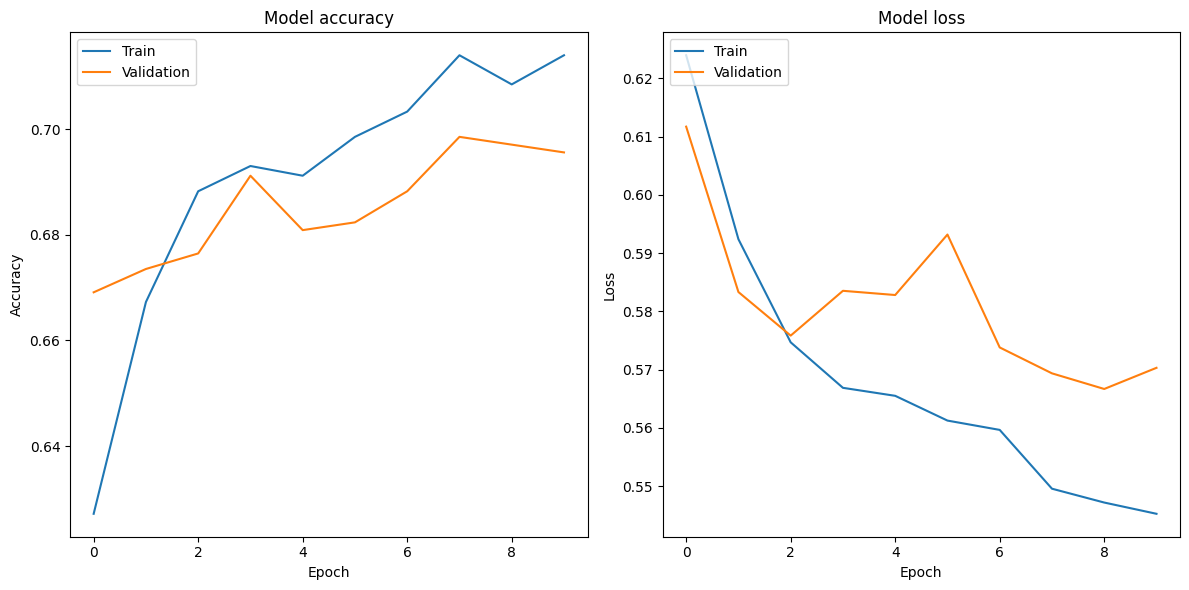

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, concatenate, Dense, Dropout, Lambda
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Limit the vocabulary size of the tokenizer
tokenizer = Tokenizer(num_words=len(word2vec_model.wv.key_to_index) + 1, oov_token="<OOV>")
tokenizer.fit_on_texts(preprocessed_data['Sentence1'] + preprocessed_data['Sentence2'])

# Convert sentences to sequences
X1_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence1'])
X2_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence2'])

# Pad sequences to a fixed length
max_sequence_length = 20  # Adjust as needed
X1_padded = pad_sequences(X1_sequences, maxlen=max_sequence_length, padding='post')
X2_padded = pad_sequences(X2_sequences, maxlen=max_sequence_length, padding='post')

# Define the Siamese Network architecture with dropout and learning rate schedule
input_shape = (max_sequence_length,)
embedding_dim = word2vec_model.wv.vector_size
lstm_units = 128  # Increased LSTM units
dropout_rate = 0.2

input_left = Input(shape=input_shape)
input_right = Input(shape=input_shape)

embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i - 1] = word2vec_model.wv[word]

embedding_layer = Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_sequence_length,
    trainable=False
)

shared_lstm = LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)

left_output = shared_lstm(embedding_layer(input_left))
right_output = shared_lstm(embedding_layer(input_right))

# Define cosine similarity function
def cosine_similarity(vectors):
    x, y = vectors
    x = tf.nn.l2_normalize(x, axis=-1)
    y = tf.nn.l2_normalize(y, axis=-1)
    return tf.reduce_sum(tf.multiply(x, y), axis=-1, keepdims=True)  # Keep cosine similarity output as a single value

# Cosine similarity layer
cosine_layer = Lambda(cosine_similarity)([left_output, right_output])

merged = concatenate([left_output, right_output, cosine_layer], axis=-1)
merged = Dropout(dropout_rate)(merged)  # Dropout layer

predictions = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input_left, input_right], outputs=predictions)

# Compile the model with cosine similarity as a metric
model.compile(optimizer=Adam(learning_rate=0.001), loss=binary_crossentropy, metrics=['accuracy', 'cosine_similarity'])

# Learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 5:
        lr *= 0.1
    return lr

# Split the data into train and validation sets
X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(
    X1_padded, X2_padded, preprocessed_data['Label'],
    test_size=0.2, random_state=42
)

# Train the model with visualization of training history
history = model.fit(
    [X1_train, X2_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X1_val, X2_val], y_val),
    callbacks=[LearningRateScheduler(lr_schedule)]
)

# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Epoch 1/10
85/85 [==============================] - 16s 133ms/step - loss: 0.6247 - accuracy: 0.6346 - val_loss: 0.6078 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 2/10
85/85 [==============================] - 10s 118ms/step - loss: 0.5906 - accuracy: 0.6728 - val_loss: 0.6109 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 3/10
85/85 [==============================] - 9s 105ms/step - loss: 0.5787 - accuracy: 0.6761 - val_loss: 0.5896 - val_accuracy: 0.6794 - lr: 0.0010
Epoch 4/10
85/85 [==============================] - 11s 131ms/step - loss: 0.5665 - accuracy: 0.6912 - val_loss: 0.5767 - val_accuracy: 0.6941 - lr: 0.0010
Epoch 5/10
85/85 [==============================] - 11s 124ms/step - loss: 0.5673 - accuracy: 0.6963 - val_loss: 0.5742 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 6/10
85/85 [==============================] - 10s 118ms/step - loss: 0.5649 - accuracy: 0.7059 - val_loss: 0.5785 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 7/10
85/85 [==============================] - 9s 108ms/step

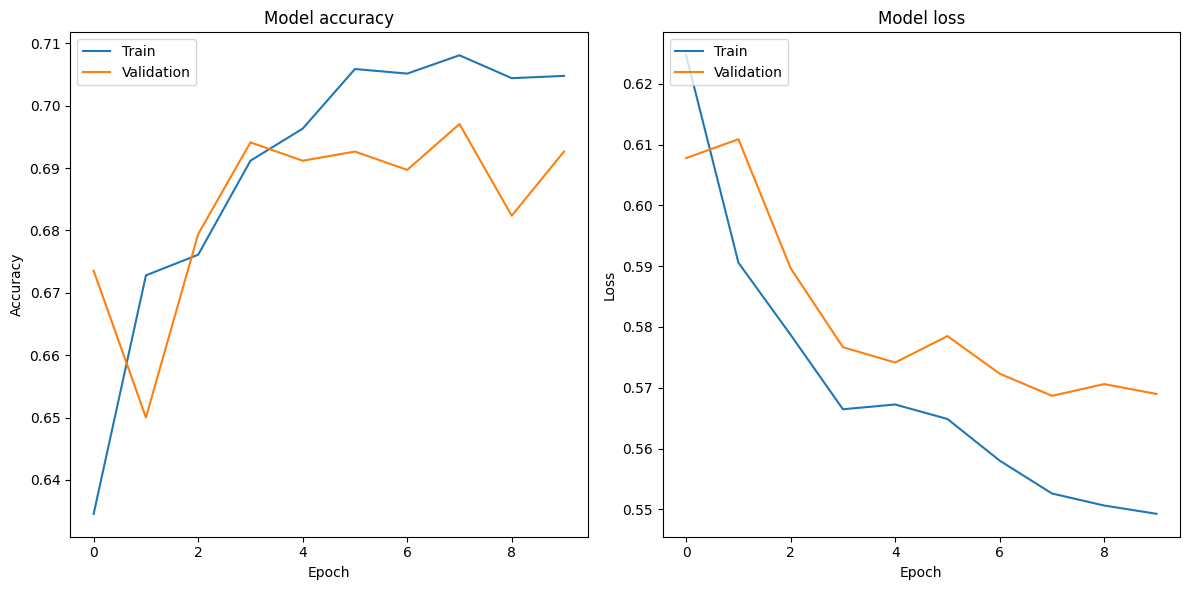

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, concatenate, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Limit the vocabulary size of the tokenizer
tokenizer = Tokenizer(num_words=len(word2vec_model.wv.key_to_index) + 1, oov_token="<OOV>")
tokenizer.fit_on_texts(preprocessed_data['Sentence1'] + preprocessed_data['Sentence2'])

# Convert sentences to sequences
X1_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence1'])
X2_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence2'])

# Pad sequences to a fixed length
max_sequence_length = 20  # Adjust as needed
X1_padded = pad_sequences(X1_sequences, maxlen=max_sequence_length, padding='post')
X2_padded = pad_sequences(X2_sequences, maxlen=max_sequence_length, padding='post')

# Define the Siamese Network architecture with dropout and learning rate schedule
input_shape = (max_sequence_length,)
embedding_dim = word2vec_model.wv.vector_size
lstm_units = 128  # Increased LSTM units
dropout_rate = 0.2

input_left = Input(shape=input_shape)
input_right = Input(shape=input_shape)

embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i - 1] = word2vec_model.wv[word]

embedding_layer = Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_sequence_length,
    trainable=False
)

shared_lstm = LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)

left_output = shared_lstm(embedding_layer(input_left))
right_output = shared_lstm(embedding_layer(input_right))

merged = concatenate([left_output, right_output], axis=-1)
merged = Dropout(dropout_rate)(merged)  # Dropout layer

predictions = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input_left, input_right], outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=binary_crossentropy, metrics=['accuracy'])

# Learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 5:
        lr *= 0.1
    return lr

# Split the data into train and validation sets
X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(
    X1_padded, X2_padded, preprocessed_data['Label'],
    test_size=0.2, random_state=42
)

# Train the model with visualization of training history
history = model.fit(
    [X1_train, X2_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X1_val, X2_val], y_val),
    callbacks=[LearningRateScheduler(lr_schedule)]
)

# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'Label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Tokenize sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(preprocessed_data['Sentence1'] + preprocessed_data['Sentence2'])

# Convert sentences to sequences
X1 = tokenizer.texts_to_sequences(preprocessed_data['Sentence1'])
X2 = tokenizer.texts_to_sequences(preprocessed_data['Sentence2'])
y = preprocessed_data['Label']

# Pad sequences
max_sequence_length = max(max(len(seq) for seq in X1), max(len(seq) for seq in X2))
X1 = tf.keras.preprocessing.sequence.pad_sequences(X1, maxlen=max_sequence_length)
X2 = tf.keras.preprocessing.sequence.pad_sequences(X2, maxlen=max_sequence_length)

# Split the data into train and test sets
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, y, test_size=0.2, random_state=42
)

# Siamese model architecture
def build_siamese_model(embedding_dim, lstm_units, vocab_size):
    input1 = Input(shape=(max_sequence_length,))
    input2 = Input(shape=(max_sequence_length,))

    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)

    lstm_layer = LSTM(lstm_units)

    encoded1 = lstm_layer(embedding_layer(input1))
    encoded2 = lstm_layer(embedding_layer(input2))

    merged = concatenate([encoded1, encoded2], axis=-1)
    output = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[input1, input2], outputs=output)
    return model

# Build and compile the Siamese model
embedding_dim = 100  # Choose an appropriate value
lstm_units = 64  # Choose an appropriate value
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token
siamese_model = build_siamese_model(embedding_dim, lstm_units, vocab_size)
siamese_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = siamese_model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=10, batch_size=32
)

# Evaluate the model using cosine similarity
X1_encoded = siamese_model.layers[3](siamese_model.layers[2](siamese_model.layers[1](X1_test)))
X2_encoded = siamese_model.layers[3](siamese_model.layers[2](siamese_model.layers[1](X2_test)))

# Convert to NumPy arrays and reshape
X1_encoded_np = np.array(X1_encoded)
X2_encoded_np = np.array(X2_encoded)
X1_encoded_flat = X1_encoded_np.reshape(X1_encoded_np.shape[0], -1)
X2_encoded_flat = X2_encoded_np.reshape(X2_encoded_np.shape[0], -1)

# Calculate cosine similarities
cosine_similarities = [cosine_similarity(X1_encoded_flat[i].reshape(1, -1), X2_encoded_flat[i].reshape(1, -1))[0][0] for i in range(len(X1_encoded_flat))]
y_pred = [1 if sim > 0.5 else 0 for sim in cosine_similarities]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy (Cosine Similarity):", accuracy)


Epoch 1/10
85/85 [==============================] - 13s 108ms/step - loss: 0.6092 - accuracy: 0.6739 - val_loss: 0.5533 - val_accuracy: 0.7324
Epoch 2/10
85/85 [==============================] - 7s 87ms/step - loss: 0.2203 - accuracy: 0.9239 - val_loss: 0.3661 - val_accuracy: 0.8279
Epoch 3/10
85/85 [==============================] - 8s 88ms/step - loss: 0.0271 - accuracy: 0.9941 - val_loss: 0.4533 - val_accuracy: 0.8279
Epoch 4/10
85/85 [==============================] - 8s 98ms/step - loss: 0.0137 - accuracy: 0.9974 - val_loss: 0.5735 - val_accuracy: 0.8059
Epoch 5/10
85/85 [==============================] - 6s 77ms/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.5143 - val_accuracy: 0.8279
Epoch 6/10
85/85 [==============================] - 8s 90ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.6671 - val_accuracy: 0.8279
Epoch 7/10
85/85 [==============================] - 7s 79ms/step - loss: 9.9151e-04 - accuracy: 1.0000 - val_loss: 0.7329 - val_accuracy: 0.8235
Epoch 8

In [29]:
# Encode test sentences
X1_encoded = siamese_model.layers[3](siamese_model.layers[2](siamese_model.layers[1](X1_test)))
X2_encoded = siamese_model.layers[3](siamese_model.layers[2](siamese_model.layers[1](X2_test)))

# Calculate cosine similarities
cosine_similarities = [cosine_similarity(X1_encoded[i].numpy().reshape(1, -1), X2_encoded[i].numpy().reshape(1, -1))[0][0] for i in range(len(X1_encoded))]

# Predict labels based on cosine similarities
y_pred = [1 if sim > 0.5 else 0 for sim in cosine_similarities]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy (Cosine Similarity):", accuracy)


Test Accuracy (Cosine Similarity): 0.4838235294117647


In [14]:
print("Tokenizer Vocabulary Size:", len(tokenizer.word_index))


NameError: name 'tokenizer' is not defined

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
embedding_dim = 100  # Choose an appropriate value
max_sequence_length = 20  # Choose an appropriate value
vocab_size = 15000  # Placeholder vocabulary size, replace with actual size

# Siamese model architecture
def build_siamese_model(embedding_dim, lstm_units):
    input1 = Input(shape=(max_sequence_length,))
    input2 = Input(shape=(max_sequence_length,))

    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)

    lstm_layer = LSTM(lstm_units)

    encoded1 = lstm_layer(embedding_layer(input1))
    encoded2 = lstm_layer(embedding_layer(input2))

    merged = concatenate([encoded1, encoded2], axis=-1)
    output = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[input1, input2], outputs=output)
    return model

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr *= 0.1
    return lr

# Build and compile the Siamese model
siamese_model = build_siamese_model(embedding_dim=embedding_dim, lstm_units=64)
siamese_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Training the model
history = siamese_model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_val, X2_val], y_val),
    epochs=30, batch_size=32,
    callbacks=[LearningRateScheduler(lr_schedule)]
)

# Visualizing training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


NameError: name 'X1_train' is not defined

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, concatenate, Dense, Dropout
from keras.optimizers import RMSprop
from keras.losses import binary_crossentropy
from keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Limit the vocabulary size of the tokenizer
tokenizer = Tokenizer(num_words=len(word2vec_model.wv.key_to_index) + 1, oov_token="<OOV>")
tokenizer.fit_on_texts(preprocessed_data['Sentence1'] + preprocessed_data['Sentence2'])

# Convert sentences to sequences
X1_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence1'])
X2_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence2'])

# Pad sequences to a fixed length
max_sequence_length = 20  # Adjust as needed
X1_padded = pad_sequences(X1_sequences, maxlen=max_sequence_length, padding='post')
X2_padded = pad_sequences(X2_sequences, maxlen=max_sequence_length, padding='post')

# Define the Siamese Network architecture with dropout and learning rate schedule
input_shape = (max_sequence_length,)
embedding_dim = word2vec_model.wv.vector_size
lstm_units = 256  # Increased LSTM units
dropout_rate = 0.3

input_left = Input(shape=input_shape)
input_right = Input(shape=input_shape)

embedding_layer = Embedding(
    input_dim=len(word2vec_model.wv.key_to_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_sequence_length,
    trainable=False
)

shared_lstm = LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)

left_output = shared_lstm(embedding_layer(input_left))
right_output = shared_lstm(embedding_layer(input_right))

merged = concatenate([left_output, right_output], axis=-1)
merged = Dropout(dropout_rate)(merged)  # Dropout layer

predictions = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input_left, input_right], outputs=predictions)

# Compile the model with RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=0.001), loss=binary_crossentropy, metrics=['accuracy'])

# Learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 5:
        lr *= 0.1
    return lr

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Split the data into train and validation sets
X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(
    X1_padded, X2_padded, preprocessed_data['Label'],
    test_size=0.2, random_state=42
)

# Train the model with visualization of training history
history = model.fit(
    [X1_train, X2_train], y_train,
    epochs=30, batch_size=32,
    validation_data=([X1_val, X2_val], y_val),
    callbacks=[LearningRateScheduler(lr_schedule), early_stopping]
)

# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'embedding_matrix' is not defined

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, concatenate, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Limit the vocabulary size of the tokenizer
tokenizer = Tokenizer(num_words=len(word2vec_model.wv.key_to_index) + 1, oov_token="<OOV>")
tokenizer.fit_on_texts(preprocessed_data['Sentence1'] + preprocessed_data['Sentence2'])

# Convert sentences to sequences
X1_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence1'])
X2_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence2'])

# Pad sequences to a fixed length
max_sequence_length = 20  # Adjust as needed
X1_padded = pad_sequences(X1_sequences, maxlen=max_sequence_length, padding='post')
X2_padded = pad_sequences(X2_sequences, maxlen=max_sequence_length, padding='post')

# Define the Siamese Network architecture with dropout and learning rate schedule
input_shape = (max_sequence_length,)
embedding_dim = word2vec_model.wv.vector_size
lstm_units = 128  # Increased LSTM units
dropout_rate = 0.2

input_left = Input(shape=input_shape)
input_right = Input(shape=input_shape)

embedding_layer = Embedding(
    input_dim=len(word2vec_model.wv.key_to_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_sequence_length,
    trainable=False
)

shared_lstm = LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)

left_output = shared_lstm(embedding_layer(input_left))
right_output = shared_lstm(embedding_layer(input_right))

merged = concatenate([left_output, right_output], axis=-1)
merged = Dropout(dropout_rate)(merged)  # Dropout layer

predictions = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input_left, input_right], outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=binary_crossentropy, metrics=['accuracy'])

# Learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 5:
        lr *= 0.1
    return lr

# Split the data into train and validation sets
X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(
    X1_padded, X2_padded, preprocessed_data['Label'],
    test_size=0.2, random_state=42
)

# Train the model with visualization of training history
history = model.fit(
    [X1_train, X2_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X1_val, X2_val], y_val),
    callbacks=[LearningRateScheduler(lr_schedule)]
)

# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'embedding_matrix' is not defined

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, concatenate, Dense
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Limit the vocabulary size of the tokenizer
tokenizer = Tokenizer(num_words=len(word2vec_model.wv.key_to_index) + 1, oov_token="<OOV>")
tokenizer.fit_on_texts(preprocessed_data['Sentence1'] + preprocessed_data['Sentence2'])

# Convert sentences to sequences
X1_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence1'])
X2_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence2'])

# Pad sequences to a fixed length
max_sequence_length = 20  # Adjust as needed
X1_padded = pad_sequences(X1_sequences, maxlen=max_sequence_length, padding='post')
X2_padded = pad_sequences(X2_sequences, maxlen=max_sequence_length, padding='post')

# Define the Siamese Network architecture
input_shape = (max_sequence_length,)
embedding_dim = word2vec_model.wv.vector_size
lstm_units = 64

input_left = Input(shape=input_shape)
input_right = Input(shape=input_shape)

embedding_layer = Embedding(
    input_dim=len(word2vec_model.wv.key_to_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_sequence_length,
    trainable=False
)

shared_lstm = LSTM(lstm_units)

left_output = shared_lstm(embedding_layer(input_left))
right_output = shared_lstm(embedding_layer(input_right))

merged = concatenate([left_output, right_output], axis=-1)

predictions = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input_left, input_right], outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=binary_crossentropy, metrics=['accuracy'])

# Split the data into train and validation sets
X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(
    X1_padded, X2_padded, preprocessed_data['Label'],
    test_size=0.2, random_state=42
)

# Train the model with visualization of training history
history = model.fit(
    [X1_train, X2_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X1_val, X2_val], y_val)
)

# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'embedding_matrix' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, concatenate, Dense
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with preprocessed data, including 'Sentence1', 'Sentence2', and 'label'
preprocessed_data = pd.read_csv('/content/drive/MyDrive/preprocessed_data_tamil.csv')

# Tokenize sentences for Word2Vec training
tokenized_sentences = [sentence.split() for sentence in preprocessed_data['Sentence1']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to get Word2Vec embeddings for a sentence
def get_word2vec_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.wv.vector_size)

# Create embedding matrix
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.wv.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_matrix[i] = word2vec_model.wv[word]

# Tokenize sentences using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_data['Sentence1'] + preprocessed_data['Sentence2'])

# Convert sentences to sequences
X1_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence1'])
X2_sequences = tokenizer.texts_to_sequences(preprocessed_data['Sentence2'])

# Pad sequences to a fixed length
max_sequence_length = 20  # Adjust as needed
X1_padded = pad_sequences(X1_sequences, maxlen=max_sequence_length, padding='post')
X2_padded = pad_sequences(X2_sequences, maxlen=max_sequence_length, padding='post')

# Define the Siamese Network architecture
input_shape = (max_sequence_length,)
embedding_dim = word2vec_model.wv.vector_size
lstm_units = 64

input_left = Input(shape=input_shape)
input_right = Input(shape=input_shape)

embedding_layer = Embedding(
    input_dim=len(word2vec_model.wv.key_to_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_sequence_length,
    trainable=False
)

shared_lstm = LSTM(lstm_units)

left_output = shared_lstm(embedding_layer(input_left))
right_output = shared_lstm(embedding_layer(input_right))

merged = concatenate([left_output, right_output], axis=-1)

predictions = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input_left, input_right], outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=binary_crossentropy, metrics=['accuracy'])

# Split the data into train and validation sets
X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(
    X1_padded, X2_padded, preprocessed_data['Label'],
    test_size=0.2, random_state=42
)

# ... (previous code)

# Print dimensions for debugging
print("X1_padded shape:", X1_padded.shape)
print("X2_padded shape:", X2_padded.shape)
print("Embedding matrix shape:", embedding_matrix.shape)

# Define the Siamese Network architecture
# ... (remaining code)

# Print summary of the model for debugging
model.summary()

# ... (remaining code)

# Train the model with visualization of training history
history = model.fit(
    [X1_train, X2_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X1_val, X2_val], y_val)
)

# Train the model with visualization of training history
history = model.fit(
    [X1_train, X2_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X1_val, X2_val], y_val)
)

# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
def generate_unl_expression(entity1, entity2, action, agent, object_entity):
    unl_expression = f"{{unl}} seq ({entity1} {entity2} (iof>object):01, {action})icl>do):02@past)\n"
    unl_expression += f"agt ({agent} (iof>agent):03, {action})icl>do):04@past) {{/unl}}"
    return unl_expression

# Sentence 1
sen1_unl = generate_unl_expression("முல்லைப்பெரியாறு அணை", "ஜான் பெனிக்யூக்", "கட்டப்பட்டது", "அவரால்", "கட்டப்பட்டது")

# Sentence 2
sen2_unl = generate_unl_expression("ஜான் பெனிக்யூக்", "முல்லைப்பெரியாறு அணை", "கட்டப்பட்டது", "அவரால்", "கட்டப்பட்டது")

# Print the UNL expressions
print("UNL Expression for Sentence 1:")
print(sen1_unl)

print("\nUNL Expression for Sentence 2:")
print(sen2_unl)


In [ ]:
def generate_unl_expression(entity1, entity2, action, agent, object_entity, modification=None):
    # Create a basic UNL expression for the given entities and action
    unl_expression = f"{{unl}} {modification}seq ({entity1} {entity2} (iof>object):01, {action})icl>do):02@past)\n"
    unl_expression += f"agt ({agent} (iof>agent):03, {action})icl>do):02@past)\n"
    unl_expression += f"aoj ({object_entity} (iof>object):04@def, {entity2})icl>create):05@past) {{/unl}}"

    return unl_expression

def concatenate_data(train_data, test_data):
    # Concatenate train and test data
    concatenated_data = train_data + test_data
    return concatenated_data

# Example usage
train_data = [
    generate_unl_expression("ஜான்", "பெனிக்யூக்", "கட்டப்பட்டது", "அவரால்", "முல்லைப்பெரியாறு அணை", "mod (ஜான் பெனிக்யூக் (iof>person):01, )iof>nature):00@entry@pred)"),
    generate_unl_expression("முல்லைப்பெரியாறு", "அணை", "கட்டப்பட்டது", "ஜான் பெனிக்யூக்", "அவரால்", "mod (முல்லைப்பெரியாறு (iof>object):01, அணை)icl>create):02@past)"),
]

test_data = [
    generate_unl_expression("ஜான்", "பெனிக்யூக்", "கட்டப்பட்டது", "அவரால்", "முல்லைப்பெரியாறு அணை", "mod (ஜான் பெனிக்யூக் (iof>person):01, )iof>nature):00@entry@pred)"),
    generate_unl_expression("முல்லைப்பெரியாறு", "அணை", "கட்டப்பட்டது", "ஜான் பெனிக்யூக்", "அவரால்", "mod (முல்லைப்பெரியாறு (iof>object):01, அணை)icl>create):02@past)"),
]

concatenated_data = concatenate_data(train_data, test_data)

# Print the concatenated data
for sentence in concatenated_data:
    print(sentence)


In [ ]:
# Assuming you have a dataset named 'data'
# Load train and test data
train_data = pd.read_csv("/content/drive/MyDrive/train_pair1 (1).csv")  # Replace with the actual path to your train data
test_data = pd.read_csv("/content/drive/MyDrive/test_pair (1).csv")

In [ ]:
train_data.shape

In [ ]:
train_data.columns

In [ ]:
pip install indic-nlp-library


In [ ]:
pip install fasttext

In [ ]:
import nltk
nltk.download('punkt')


In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
import pandas as pd
from indicnlp.tokenize import sentence_tokenize, indic_tokenize

# Load your custom set of Tamil stopwords
custom_tamil_stopwords = {"என்று", "இது", "அந்த", "இதன்", "அது", "இந்த", "அவன்"}  # Add more words as needed


# Tokenize the text using IndicNLP tokenizer
def tokenize_text(text):
    sentences = sentence_tokenize.sentence_split(text, lang='ta')
    tokenized_sentences = [indic_tokenize.trivial_tokenize(sent) for sent in sentences]
    return tokenized_sentences

# Apply tokenization to train and test data
train_data['Tokenized1'] = train_data['Sentence1'].apply(tokenize_text)
train_data['Tokenized2'] = train_data['Sentence2'].apply(tokenize_text)

test_data['Tokenized1'] = test_data['Sentence1'].apply(tokenize_text)
test_data['Tokenized2'] = test_data['Sentence2'].apply(tokenize_text)

# Define Jaccard Similarity function
def jaccard_similarity(row):
    tokens1 = set(token for tokens in row['Tokenized1'] for token in tokens)
    tokens2 = set(token for tokens in row['Tokenized2'] for token in tokens)

    intersection = len(tokens1.intersection(tokens2))
    union = len(tokens1) + len(tokens2) - intersection

    # Handle division by zero
    return intersection / union if union != 0 else 0

# Apply Jaccard Similarity to train and test data
train_data['JaccardSimilarity'] = train_data.apply(jaccard_similarity, axis=1)
test_data['JaccardSimilarity'] = test_data.apply(jaccard_similarity, axis=1)

# Display the resulting dataframe
print(train_data[['Sentence1', 'Sentence2', 'JaccardSimilarity']])


In [ ]:
from nltk.metrics import jaccard_distance
# Example sentences in Tamil
sentence1 = "நான் என்ற சொல்லை ஒழித்து நாம் என்று உருவாக்குவோம்"
sentence2 = "நான் என்ற சொல்லை ஒழிப்பதன்மூலம் நாம் என்ற ஒற்றுமையை உருவாக்கிடுவோம்"

# Tokenize sentences
tokens1 = set(sentence1.split())
tokens2 = set(sentence2.split())

# Calculate Jaccard Similarity
jaccard_sim = 1 - jaccard_distance(tokens1, tokens2)

print(f"Jaccard Similarity: {jaccard_sim}")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
import numpy as np

# Example sentences in Tamil
sentence1 = "நான் என்ற சொல்லை ஒழித்து நாம் என்று உருவாக்குவோம்."
sentence2 = "நான் என்ற சொல்லை ஒழிப்பதன்மூலம் நாம் என்ற ஒற்றுமையை உருவாக்கிடுவோம்."

# Tokenization
tokens1 = sentence1.split()
tokens2 = sentence2.split()

# Cosine Similarity
vectorizer = CountVectorizer().fit_transform([sentence1, sentence2])
cosine_similarity = np.dot(vectorizer, vectorizer.T).toarray()
print(f"Cosine Similarity: {cosine_similarity[0, 1]}")

# Word Order Similarity
ngram_size = 2  # You can change this to any desired n-gram size
ngrams1 = list(ngrams(tokens1, ngram_size))
ngrams2 = list(ngrams(tokens2, ngram_size))
common_ngrams = set(ngrams1).intersection(ngrams2)
word_order_similarity = len(common_ngrams) / max(len(ngrams1), len(ngrams2))
print(f"Word Order Similarity: {word_order_similarity}")

# Sørensen-Dice Coefficient
intersection = len(set(tokens1).intersection(tokens2))
sorensen_dice_coefficient = 2 * intersection / (len(tokens1) + len(tokens2))
print(f"Sørensen-Dice Coefficient: {sorensen_dice_coefficient}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
import networkx as nx
from scipy.spatial.distance import cosine
import fasttext
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load your custom set of Tamil stopwords
custom_tamil_stopwords = {"என்று", "இது", "அந்த", "இதன்", "அது", "இந்த", "அவன்", ...}  # Add more words as needed

   # Replace with the actual path to your test data

# Preprocessing step
def preprocess(text, stopwords):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

train_data['Preprocessed1'] = train_data['Sentence1'].apply(lambda x: preprocess(x, custom_tamil_stopwords))
train_data['Preprocessed2'] = train_data['Sentence2'].apply(lambda x: preprocess(x, custom_tamil_stopwords))

test_data['Preprocessed1'] = test_data['Sentence1'].apply(lambda x: preprocess(x, custom_tamil_stopwords))
test_data['Preprocessed2'] = test_data['Sentence2'].apply(lambda x: preprocess(x, custom_tamil_stopwords))

def jaccard_similarity(row):
    tokens1 = set(row['Tokenized1'])
    tokens2 = set(row['Tokenized2'])

    intersection = len(tokens1.intersection(tokens2))
    union = len(tokens1) + len(tokens2) - intersection

    # Handle division by zero
    return intersection / union if union != 0 else 0

train_data['JaccardSimilarity'] = train_data.apply(jaccard_similarity, axis=1)
test_data['JaccardSimilarity'] = test_data.apply(jaccard_similarity, axis=1)

# Feature extraction - Cosine Similarity
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['Preprocessed1'] + ' ' + train_data['Preprocessed2'])
X_test = vectorizer.transform(test_data['Preprocessed1'] + ' ' + test_data['Preprocessed2'])
cosine_similarities = cosine_similarity(X_train, X_test)
train_data['CosineSimilarity'] = cosine_similarities.max(axis=1)

# Feature extraction - Word Order Similarity
def word_order_similarity(row):
    tokens1 = row['Preprocessed1'].split()
    tokens2 = row['Preprocessed2'].split()
    common_tokens = set(tokens1) & set(tokens2)
    return len(common_tokens) / len(set(tokens1 + tokens2))

train_data['WordOrderSimilarity'] = train_data.apply(word_order_similarity, axis=1)
test_data['WordOrderSimilarity'] = test_data.apply(word_order_similarity, axis=1)

# Feature extraction - Semantic Similarity (Using UNL graph)
# You need to implement this based on your specific requirements, it involves building a semantic graph.

# Concatenate features for XGBoost classifier
X_train_xgb = train_data[['JaccardSimilarity', 'CosineSimilarity', 'WordOrderSimilarity']]
y_train_xgb = train_data['Label']
X_test_xgb = test_data[['JaccardSimilarity', 'CosineSimilarity', 'WordOrderSimilarity']]
y_test_xgb = test_data['Label']

# Train XGBoost classifier
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate XGBoost model
from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")

# Feature extraction for Siamese Neural Network with LSTM
# Assuming you have additional features like Word2Vec, GloVe, FastText
# Replace 'load_word2vec_features', 'load_glove_features', 'load_fasttext_features' with your actual loading functions
word2vec_features_train = load_word2vec_features(train_data['Sentence1'])
word2vec_features_test = load_word2vec_features(test_data['Sentence1'])

# Concatenate additional features
X_train_lstm = [word2vec_features_train, train_data['JaccardSimilarity'], train_data['CosineSimilarity'], train_data['WordOrderSimilarity']]
X_test_lstm = [word2vec_features_test, test_data['JaccardSimilarity'], test_data['CosineSimilarity'], test_data['WordOrderSimilarity']]
y_train_lstm = train_data['Label']
y_test_lstm = test_data['Label']

# Siamese Neural Network with LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, concatenate, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define input layers
input_word2vec = Input(shape=(word2vec_features_train.shape[1],))
input_jaccard = Input(shape=(1,))
input_cosine = Input(shape=(1,))
input_word_order = Input(shape=(1,))

# Siamese branch for Word2Vec
lstm_word2vec = Dense(50, activation='relu')(input_word2vec)

# Other branches
dense_jaccard = Dense(1, activation='relu')(input_jaccard)
dense_cosine = Dense(1, activation='relu')(input_cosine)
dense_word_order = Dense(1, activation='relu')(input_word_order)

# Concatenate branches
merged = concatenate([lstm_word2vec, dense_jaccard, dense_cosine, dense_word_order])

# Output layer
output = Dense(1, activation='sigmoid')(merged)

# Create model
model_lstm = Model(inputs=[input_word2vec, input_jaccard, input_cosine, input_word_order], outputs=output)

# Compile and train the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)[1]
print(f"Siamese Neural Network (LSTM) Accuracy: {accuracy_lstm}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import xgboost as xgb


# Extract features using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['Sentence1'] + ' ' + train['Sentence2'])
X_test = vectorizer.transform(test['Sentence1'] + ' ' + test['Sentence2'])

# Define the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, train['Label'])

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(test['Label'], predictions)
print(f"Accuracy: {accuracy}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, concatenate, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Assume you have additional features like Word2Vec, GloVe, FastText
# Replace 'load_word2vec_features', 'load_glove_features', 'load_fasttext_features' with your actual loading functions
word2vec_features_train = load_word2vec_features(train_data['Sentence1'])
word2vec_features_test = load_word2vec_features(test_data['Sentence1'])

glove_features_train = load_glove_features(train_data['Sentence1'])
glove_features_test = load_glove_features(test_data['Sentence1'])

fasttext_features_train = load_fasttext_features(train_data['Sentence1'])
fasttext_features_test = load_fasttext_features(test_data['Sentence1'])

# Combine training and test data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_data['Sentence1'] + ' ' + combined_data['Sentence2'])

# Convert sentences to sequences
seq1_train = tokenizer.texts_to_sequences(train_data['Sentence1'])
seq2_train = tokenizer.texts_to_sequences(train_data['Sentence2'])

seq1_test = tokenizer.texts_to_sequences(test_data['Sentence1'])
seq2_test = tokenizer.texts_to_sequences(test_data['Sentence2'])

# Pad sequences to the same length
padded_seq1_train = pad_sequences(seq1_train)
padded_seq2_train = pad_sequences(seq2_train)

padded_seq1_test = pad_sequences(seq1_test)
padded_seq2_test = pad_sequences(seq2_test)

# Assume you have additional features like Word2Vec, GloVe, FastText
# You may need to adapt the dimensions based on your actual feature dimensions
word2vec_input = Input(shape=(word2vec_features_train.shape[1],))
glove_input = Input(shape=(glove_features_train.shape[1],))
fasttext_input = Input(shape=(fasttext_features_train.shape[1],))

# Define the Siamese Neural Network model
embedding_dim = 50  # You can adjust this based on your requirements

input1 = Input(shape=(None,))
input2 = Input(shape=(None,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim)

embedded_seq1 = embedding_layer(input1)
embedded_seq2 = embedding_layer(input2)

lstm_layer = LSTM(50)  # You can adjust this based on your requirements

output1 = lstm_layer(embedded_seq1)
output2 = lstm_layer(embedded_seq2)

merged_lstm = concatenate([output1, output2])
merged_features = concatenate([word2vec_input, glove_input, fasttext_input])

merged_all = concatenate([merged_lstm, merged_features])
dense_layer = Dense(1, activation='sigmoid')
output = dense_layer(merged_all)

model = Model(inputs=[input1, input2, word2vec_input, glove_input, fasttext_input], outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(
    [padded_seq1_train, padded_seq2_train, word2vec_features_train, glove_features_train, fasttext_features_train],
    train_data['Label'],
    epochs=10,
    batch_size=64,
)

# Evaluate the model on the test set
accuracy = model.evaluate(
    [padded_seq1_test, padded_seq2_test, word2vec_features_test, glove_features_test, fasttext_features_test],
    test_data['Label']
)[1]
print(f"Accuracy: {accuracy}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, concatenate, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Load train and test datasets
train_data = pd.read_csv("/content/drive/MyDrive/train_pair1 (1).csv")  # Replace with the actual path to your train data
test_data = pd.read_csv("/content/drive/MyDrive/test_pair (1).csv")    # Replace with the actual path to your test data

# Combine train and test datasets for tokenization and fitting tokenizer
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_data['Sentence1'] + ' ' + combined_data['Sentence2'])

# Convert sentences to sequences for train and test datasets
train_seq1 = pad_sequences(tokenizer.texts_to_sequences(train_data['Sentence1'] + ' ' + train_data['Sentence2']))
test_seq1 = pad_sequences(tokenizer.texts_to_sequences(test_data['Sentence1'] + ' ' + test_data['Sentence2']))

# Pad sequences to the same length
max_len = max(max(len(seq) for seq in train_seq1), max(len(seq) for seq in test_seq1))
train_seq1 = pad_sequences(train_seq1, maxlen=max_len)
test_seq1 = pad_sequences(test_seq1, maxlen=max_len)

# Define the Siamese Neural Network model
embedding_dim = 50

input1 = Input(shape=(max_len,))
input2 = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim)

embedded_seq1 = embedding_layer(input1)
embedded_seq2 = embedding_layer(input2)

shared_lstm = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2))

output1 = shared_lstm(embedded_seq1)
output2 = shared_lstm(embedded_seq2)

merged = concatenate([output1, output2])
dense_layer = Dense(64, activation='relu')(merged)
dropout_layer = Dropout(0.5)(dense_layer)
output = Dense(1, activation='sigmoid')(dropout_layer)

model = Model(inputs=[input1, input2], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit([train_seq1, train_seq1], train_data['Label'],
                    epochs=20, batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
accuracy = model.evaluate([test_seq1, test_seq1], test_data['Label'])[1]
print(f"Accuracy: {accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
train_data.head(5)

In [ ]:
# Assuming you have a dataset named 'data'
# Load train and test data
train_data = pd.read_csv("/content/drive/MyDrive/train_pair1 (1).csv")  # Replace with the actual path to your train data
test_data = pd.read_csv("/content/drive/MyDrive/test_pair (1).csv")

In [ ]:
import pandas as pd
from indicnlp.tokenize import sentence_tokenize, indic_tokenize
from indicnlp.normalize import indic_normalize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load your custom set of Tamil stopwords
custom_tamil_stopwords = {"என்று", "இது", "அந்த", "இதன்", "அது", "இந்த", "அவன்", ...}  # Add more words as needed



# Tokenize the text using IndicNLP tokenizer
def tokenize_text(text):
    sentences = sentence_tokenize.sentence_split(text, lang='ta')
    tokenized_sentences = [indic_tokenize.trivial_tokenize(sent) for sent in sentences]
    return tokenized_sentences

# Normalize and clean the text using IndicNLP normalizer
def normalize_text(tokenized_sentences):
    cleaned_sentences = []
    for tokens in tokenized_sentences:
        cleaned_tokens = [indic_normalize.IndicNormalizerFactory().get_normalizer("ta").normalize(token) for token in tokens if token not in custom_tamil_stopwords]
        cleaned_sentences.append(' '.join(cleaned_tokens))
    return cleaned_sentences

# Combine sentences back into text
def combine_sentences(tokenized_sentences):
    return ' '.join([' '.join(tokens) for tokens in tokenized_sentences])

# Preprocess train data
train_data['Tokenized1'] = train_data['Sentence1'].apply(tokenize_text)
train_data['Tokenized2'] = train_data['Sentence2'].apply(tokenize_text)

train_data['Normalized1'] = train_data['Tokenized1'].apply(normalize_text)
train_data['Normalized2'] = train_data['Tokenized2'].apply(normalize_text)

train_data['Preprocessed1'] = train_data['Tokenized1'].apply(combine_sentences)
train_data['Preprocessed2'] = train_data['Tokenized2'].apply(combine_sentences)

# Preprocess test data
test_data['Tokenized1'] = test_data['Sentence1'].apply(tokenize_text)
test_data['Tokenized2'] = test_data['Sentence2'].apply(tokenize_text)

test_data['Normalized1'] = test_data['Tokenized1'].apply(normalize_text)
test_data['Normalized2'] = test_data['Tokenized2'].apply(normalize_text)

test_data['Preprocessed1'] = test_data['Tokenized1'].apply(combine_sentences)
test_data['Preprocessed2'] = test_data['Tokenized2'].apply(combine_sentences)

# Display the preprocessed data
print("Train Data:")
print(train_data[['Preprocessed1', 'Preprocessed2']])
print("\nTest Data:")
print(test_data[['Preprocessed1', 'Preprocessed2']])


In [ ]:
# Set the maximum sequence length (you can adjust this based on your training data)
maxlen = 100


In [ ]:
# Assuming maxlen is the maximum sequence length used during training
test_seq1 = pad_sequences(tokenizer.texts_to_sequences(test['Sentence1']), maxlen=maxlen)
test_seq2 = pad_sequences(tokenizer.texts_to_sequences(test['Sentence2']), maxlen=maxlen)


In [ ]:
print("Shape of padded_seq1_test:", padded_seq1_test.shape)
print("Shape of padded_seq2_test:", padded_seq2_test.shape)

In [ ]:
accuracy = model.evaluate([test_seq1, test_seq2], test['Label'])[1]
print(f"Accuracy: {accuracy}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Bidirectional, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load your train and test datasets (replace "train_dataset.csv" and "test_dataset.csv" with your actual file paths)
train_data = pd.read_csv("/content/drive/MyDrive/train_pair1 (1).csv")
test_data = pd.read_csv("/content/drive/MyDrive/test_pair (1).csv")

# Concatenate train and test data for tokenization
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_data['Sentence1'] + ' ' + all_data['Sentence2'])

# Convert sentences to sequences for train and test data
seq1_train = tokenizer.texts_to_sequences(train_data['Sentence1'])
seq2_train = tokenizer.texts_to_sequences(train_data['Sentence2'])
seq1_test = tokenizer.texts_to_sequences(test_data['Sentence1'])
seq2_test = tokenizer.texts_to_sequences(test_data['Sentence2'])

# Pad sequences to the same length
max_len = max(
    max(len(seq) for seq in seq1_train),
    max(len(seq) for seq in seq2_train),
    max(len(seq) for seq in seq1_test),
    max(len(seq) for seq in seq2_test)
)

padded_seq1_train = pad_sequences(seq1_train, maxlen=max_len)
padded_seq2_train = pad_sequences(seq2_train, maxlen=max_len)
padded_seq1_test = pad_sequences(seq1_test, maxlen=max_len)
padded_seq2_test = pad_sequences(seq2_test, maxlen=max_len)

# Define the Siamese LSTM model
embedding_dim = 50  # You can adjust this based on your requirements

# Shared embedding layer
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim)

# Siamese LSTM model
input1 = Input(shape=(max_len,))
input2 = Input(shape=(max_len,))

shared_lstm = Bidirectional(LSTM(50))  # You can adjust the LSTM units

output1 = shared_lstm(embedding_layer(input1))
output2 = shared_lstm(embedding_layer(input2))

# Concatenate the outputs and add dense layers
merged = Concatenate()([output1, output2])
dense1 = Dense(16, activation='relu')(merged)
dense2 = Dense(1, activation='sigmoid')(dense1)

siamese_lstm_model = Model(inputs=[input1, input2], outputs=dense2)

# Compile the model
siamese_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = siamese_lstm_model.fit(
    [padded_seq1_train, padded_seq2_train],
    train_data['Label'],
    epochs=10,
    batch_size=64,
    validation_data=([padded_seq1_test, padded_seq2_test], test_data['Label'])
)

# Plot the training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Siamese LSTM Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
